# A blief tutorial of ZENomix (Y. Okochi, 16/04/23)

This tutorial is application of ZENomix to MZoep zebrafish data (Farrel, et al., 2018).

### environment

In [ ]:
!sw_vers

ProductName:	Mac OS X
ProductVersion:	10.15.7
BuildVersion:	19H2


In [ ]:
import sys
sys.version

'3.8.3 (default, Jul 14 2020, 15:24:14) \n[Clang 11.0.3 (clang-1103.0.32.62)]'

### import ZENomix

In [ ]:
import zenomix

#for loading data
import pandas as pd
%matplotlib inline

/Users/yasokochi/OneDrive - Kyoto University/backup/07_perler_private_test/.venv/lib/python3.8/site-packages/pandas/compat/__init__.py:97: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


In [ ]:
perler.__version__

'0.1.0'

### Loading dataset

This dataset is generated by Karaiskos et al., 2017

and is aquired from Drosophila Virtual Expression eXplorer (DVEX, URL: https://shiny.mdc-berlin.de/DVEX/)


・dge_normalized.txt: scRNAseq data

・bdtnp.txt: in situ data

・geometry_dvex.txt: cell location data


ref: Karaiskos et al, 2017 (doi: 10.1126/science.aan3235)

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

#for import PERLER module
import sys
import os
from os.path import dirname, abspath
import random
import pickle
import gzip
from pathlib import Path



parent_dir = dirname(dirname(abspath(Path().resolve())))
sys.path.append(parent_dir)
import modules.yo_module_221110 as md

random.seed(0)

In [2]:
%load_ext line_profiler
%load_ext memory_profiler

In [3]:
exp_name = 'DR_MT_experiments'

In [4]:
dir_name = '../results/DR/' + exp_name + '/'

In [5]:
if os.path.exists(dir_name):
    print('true')
else:
    print('this directory does not exist...')
    os.mkdir(dir_name)

true


data

In [6]:
data = pd.read_csv("../../data/zfish/data.txt", sep='\t').T
reference = pd.read_csv("../../data/zfish/insitu.txt", sep='\t')
geometry = pd.read_csv("../../data/zfish/pseudo.geometry.tsv", sep = '\t')

In [7]:
ISH = pd.read_csv('../../data/zfish/insitu.txt', sep = '\t')
OEP = pd.read_csv("../../data/MZoep/processed/OEP_nr.txt", sep="\t").T
MIX = pd.read_csv("../../data/MZoep/processed/MIX_nr.txt", sep="\t").T
WT = pd.read_csv("../../data/MZoep/processed/WT_nr.txt", sep="\t").T
WT_cells = [gene for gene in MIX.index if gene[0] =='w']
OEP_cells = [gene for gene in MIX.index if gene[0] =='o']
MIX_wt = MIX.drop(index = OEP_cells)
MIX_oep = MIX.drop(index = WT_cells)
data_Mutant = np.log2(pd.concat([OEP, MIX_oep], axis = 0) + 1)
data_Wildtype = np.log2(pd.concat([WT, MIX_wt], axis = 0) + 1)

In [8]:
reference.shape

(64, 47)

In [9]:
data_Mutant.shape

(325, 26545)

In [10]:
model = md.Model(data = data_Mutant, reference = reference, latent_dim=20, num_inducing=50, S2=1., sigma2=.1, kernel_hyperparameters=[0.01])

In [11]:
%%time
%memit model.latent_calibration()

RUNNING THE L-BFGS-B CODE

           * * *

Machine precision = 2.220D-16
 N =         8783     M =           10

At X0         0 variables are exactly at the bounds

At iterate    0    f=  2.00000D+00    |proj g|=  8.79542D+00

At iterate    1    f=  1.64061D+00    |proj g|=  1.50847D+00

At iterate    2    f=  1.61060D+00    |proj g|=  1.19988D+00

At iterate    3    f=  1.55427D+00    |proj g|=  5.80305D-01

At iterate    4    f=  1.53117D+00    |proj g|=  3.44355D-01

At iterate    5    f=  1.51251D+00    |proj g|=  2.61582D-01

At iterate    6    f=  1.50065D+00    |proj g|=  1.36948D-01

At iterate    7    f=  1.49058D+00    |proj g|=  5.80827D-02


 This problem is unconstrained.



At iterate    8    f=  1.47953D+00    |proj g|=  1.06633D-01

At iterate    9    f=  1.46199D+00    |proj g|=  1.43500D-01

At iterate   10    f=  1.42867D+00    |proj g|=  1.93819D-01

At iterate   11    f=  1.35184D+00    |proj g|=  2.18076D-01

At iterate   12    f=  1.29832D+00    |proj g|=  1.99372D-01

At iterate   13    f=  1.19857D+00    |proj g|=  1.34458D-01

At iterate   14    f=  1.16695D+00    |proj g|=  1.41357D-01

At iterate   15    f=  1.09025D+00    |proj g|=  2.50576D-01

At iterate   16    f=  9.91052D-01    |proj g|=  6.15248D-01

At iterate   17    f=  9.25291D-01    |proj g|=  6.09053D-01

At iterate   18    f=  9.00266D-01    |proj g|=  1.86536D-01

At iterate   19    f=  8.67401D-01    |proj g|=  2.29026D-01

At iterate   20    f=  8.23576D-01    |proj g|=  3.42252D-01

At iterate   21    f=  8.10206D-01    |proj g|=  8.41593D-02

At iterate   22    f=  8.07977D-01    |proj g|=  1.13860D-01

At iterate   23    f=  8.01622D-01    |proj g|=  7.71502D-02

At iter

### Reconstruction

In [12]:
model.reconstruction()

In [13]:
with gzip.open(dir_name + 'DR_MT.pickle.gz', 'wb') as f:
    f.write(pickle.dumps(model))

In [14]:
data_Mutant['AXIN2']

oep_p0_S10    1.909182
oep_p0_S11    2.752862
oep_p0_S12    0.000000
oep_p0_S13    0.000000
oep_p0_S14    5.643902
                ...   
oep_p4_S5     0.367922
oep_p4_S6     0.000000
oep_p4_S7     2.202434
oep_p4_S8     2.339989
oep_p4_S9     0.544335
Name: AXIN2, Length: 325, dtype: float64

(array([103.,   7.,   9.,  18.,  18.,  16.,  20.,  12.,  29.,  20.,  11.,
         12.,  11.,   8.,   9.,   8.,   4.,   6.,   3.,   1.]),
 array([0.        , 0.28219511, 0.56439021, 0.84658532, 1.12878043,
        1.41097554, 1.69317064, 1.97536575, 2.25756086, 2.53975596,
        2.82195107, 3.10414618, 3.38634128, 3.66853639, 3.9507315 ,
        4.23292661, 4.51512171, 4.79731682, 5.07951193, 5.36170703,
        5.64390214]),
 <BarContainer object of 20 artists>)

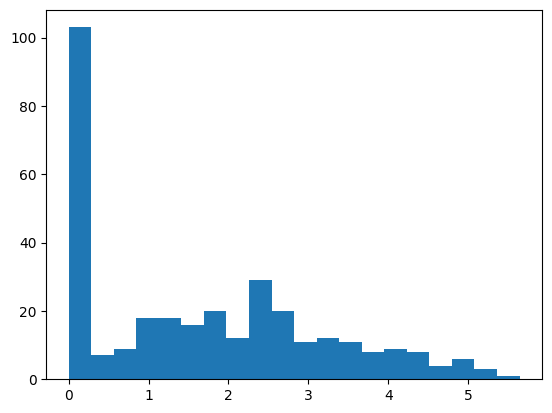

In [15]:
plt.hist(data_Mutant['AXIN2'], bins = 20)

(array([649.,   1.,   5.,  25.,  43.,  44.,  33.,  29.,  29.,  33.,  35.,
         33.,  24.,  27.,  15.,  25.,  18.,  10.,  10.,   5.]),
 array([0.        , 0.27457305, 0.54914611, 0.82371916, 1.09829221,
        1.37286527, 1.64743832, 1.92201137, 2.19658443, 2.47115748,
        2.74573053, 3.02030359, 3.29487664, 3.56944969, 3.84402275,
        4.1185958 , 4.39316885, 4.66774191, 4.94231496, 5.21688801,
        5.49146107]),
 <BarContainer object of 20 artists>)

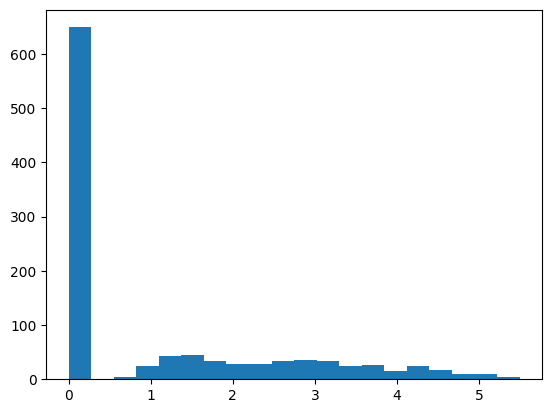

In [16]:
plt.hist(data_Wildtype['AXIN2'], bins = 20)

(array([170.,  14.,   7.,   6.,   7.,  12.,   8.,   7.,   9.,   7.,  17.,
          6.,   8.,   9.,   7.,  15.,   6.,   7.,   1.,   2.]),
 array([0.        , 0.33671323, 0.67342646, 1.0101397 , 1.34685293,
        1.68356616, 2.02027939, 2.35699262, 2.69370585, 3.03041909,
        3.36713232, 3.70384555, 4.04055878, 4.37727201, 4.71398525,
        5.05069848, 5.38741171, 5.72412494, 6.06083817, 6.39755141,
        6.73426464]),
 <BarContainer object of 20 artists>)

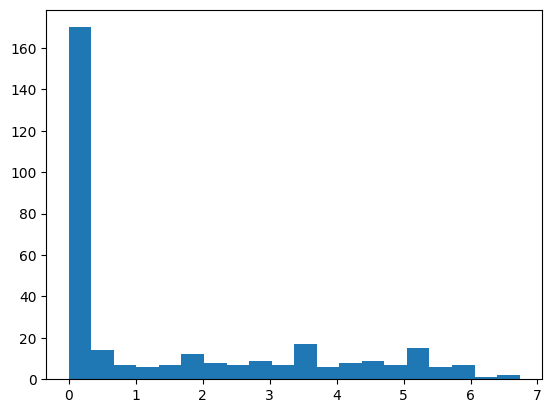

In [17]:
plt.hist(data_Mutant['CDX4'], bins = 20)

(array([216.,   9.,   0.,   4.,   3.,   5.,   6.,   8.,  11.,   5.,   5.,
          6.,   3.,   7.,   9.,  10.,  12.,   3.,   0.,   3.]),
 array([0.        , 0.27928052, 0.55856104, 0.83784156, 1.11712209,
        1.39640261, 1.67568313, 1.95496365, 2.23424417, 2.51352469,
        2.79280522, 3.07208574, 3.35136626, 3.63064678, 3.9099273 ,
        4.18920782, 4.46848834, 4.74776887, 5.02704939, 5.30632991,
        5.58561043]),
 <BarContainer object of 20 artists>)

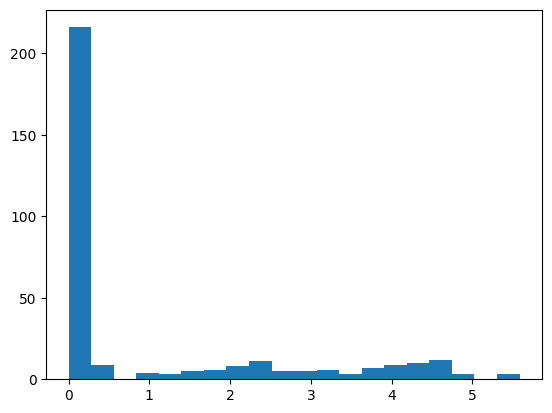

In [18]:
plt.hist(data_Mutant['GBX1'], bins = 20)

(array([166.,   4.,  11.,   7.,   3.,   9.,  10.,  11.,  13.,  12.,  18.,
         10.,   8.,   8.,   6.,  10.,   8.,   6.,   2.,   3.]),
 array([0.        , 0.30763076, 0.61526153, 0.92289229, 1.23052305,
        1.53815382, 1.84578458, 2.15341534, 2.46104611, 2.76867687,
        3.07630763, 3.3839384 , 3.69156916, 3.99919993, 4.30683069,
        4.61446145, 4.92209222, 5.22972298, 5.53735374, 5.84498451,
        6.15261527]),
 <BarContainer object of 20 artists>)

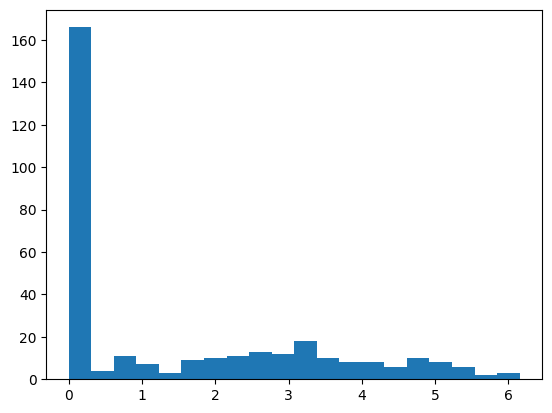

In [19]:
plt.hist(data_Mutant['MSX1B'], bins = 20)

(array([99.,  7.,  9.,  6., 10., 21., 19., 13., 16., 10., 17., 17., 19.,
        22., 19.,  9.,  6.,  5.,  0.,  1.]),
 array([0.        , 0.2895813 , 0.5791626 , 0.86874389, 1.15832519,
        1.44790649, 1.73748779, 2.02706908, 2.31665038, 2.60623168,
        2.89581298, 3.18539427, 3.47497557, 3.76455687, 4.05413817,
        4.34371947, 4.63330076, 4.92288206, 5.21246336, 5.50204466,
        5.79162595]),
 <BarContainer object of 20 artists>)

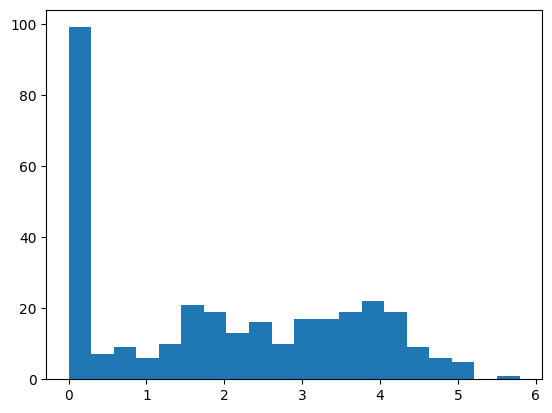

In [20]:
plt.hist(data_Mutant['SOX2'], bins = 20)

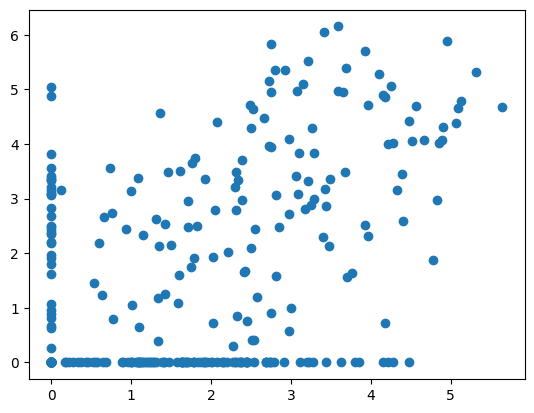

In [21]:
plt.scatter(data_Mutant['AXIN2'], data_Mutant['MSX1B'])

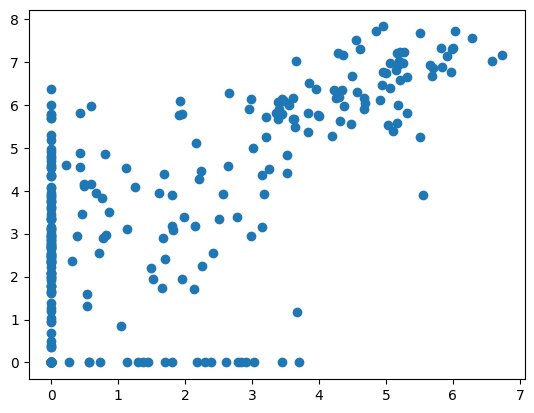

In [22]:
plt.scatter(data_Mutant['CDX4'], data_Mutant['EVE1'])

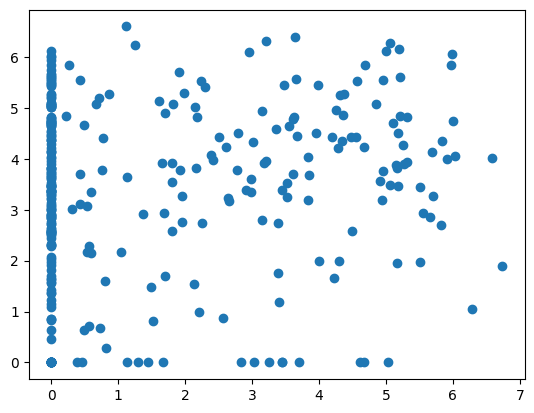

In [23]:
plt.scatter(data_Mutant['CDX4'], data_Mutant['FOXD5'])